In [1]:
##### Supervised Learning  - Under the Superviosn of someone---
#### In Supervised learning you will have the answer --- Training based on the answers
#### When a new data arrives you tries to predct----

In [ ]:
1. Extracting the data
2. Preprocessing the data
3. Pattern analysis/ EDA
4. Feature Enginnering
5. Model planning/ building
6. saving of the Model

In [ ]:
##### Diagonistics of Regression - 
1. Rsquare
2. RMSE  (Root Mean Squared Error)
3. MAE/MSE

In [ ]:
#### Simple linear regression with Sampling
##### Whether your model is fitting the data properly or not
#### Transformation you can perform
1. Scaling - Standard, Minmax, Robust, Normalizer
2. Correlation to check which features are important
3. Check the variance - Flunctuating more

In [12]:
###### Importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #### normal viz package only 
import seaborn as sns  #### Created on top of matplotlib

In [4]:
##### Getting the data ---
def read_data():
    data = sns.load_dataset('healthexp')
    return data

In [6]:
##### Calling the read Data Function
df = read_data()
print(df.head())
print(df.info())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB
None


In [7]:
#### Preprocessing and Feature Enginneering
df1 = df.copy()
print(df1)

     Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]


In [10]:
#### Exploratory Data Analysis
df1['Year'].value_counts()

Year
1995    6
2008    6
1998    6
1999    6
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2009    6
1996    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
2016    6
2017    6
2018    6
2019    6
1997    6
2020    6
1985    6
1993    6
1992    6
1980    6
1990    6
1994    6
1971    5
1981    5
1982    5
1984    5
1983    5
1986    5
1987    5
1988    5
1989    5
1991    5
1970    5
1979    4
1976    4
1975    4
1978    3
1977    3
1974    3
1973    3
1972    3
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

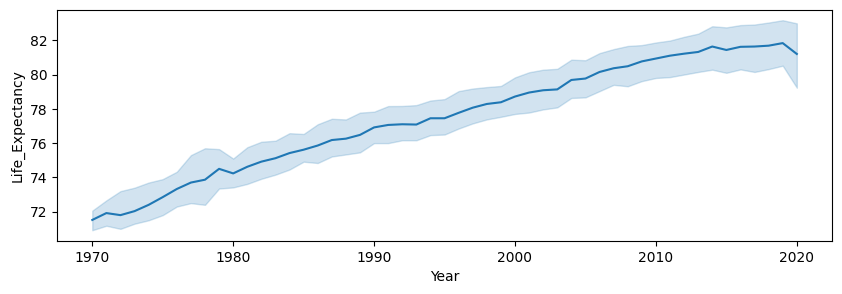

In [15]:
plt.figure(figsize=(10,3))
sns.lineplot(x = 'Year', y = 'Life_Expectancy', data = df1)

In [ ]:
#### Inference - There is an year on year increase in the the life Expectancy Value

-0.20233768373091185
count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64


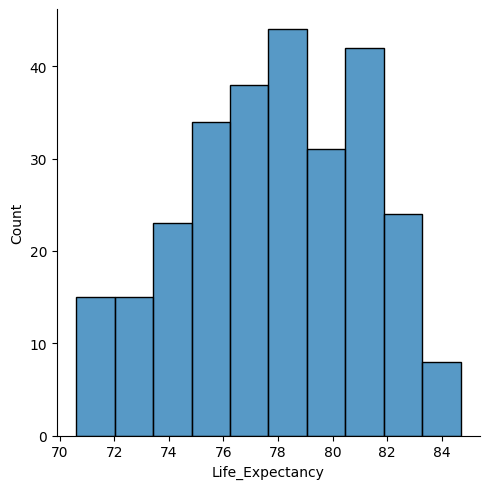

In [17]:
sns.displot(x = df1['Life_Expectancy'])
print(df1['Life_Expectancy'].skew())
print(df1['Life_Expectancy'].describe())

In [ ]:
#### As we can see that the distribution of LifeExpectancy is normally distributed.

<Axes: xlabel='Life_Expectancy'>

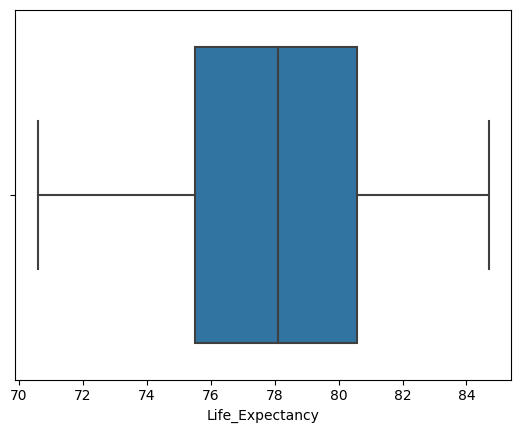

In [18]:
sns.boxplot(x = df1['Life_Expectancy'])

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

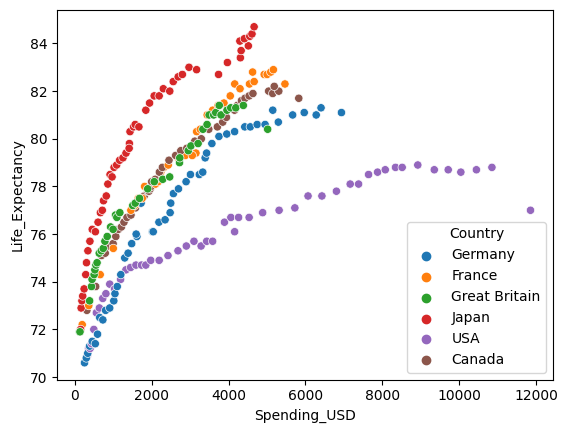

In [20]:
sns.scatterplot(x = 'Spending_USD', y = 'Life_Expectancy',hue = 'Country',data = df1)

In [22]:
df1[['Spending_USD','Life_Expectancy']].var()

Spending_USD       4.817761e+06
Life_Expectancy    1.073390e+01
dtype: float64

In [23]:
df1.shape

(274, 4)

In [24]:
model_data = df1[['Spending_USD','Life_Expectancy']]
model_data

,Spending_USD,Life_Expectancy
0,252.311,70.6
1,192.143,72.2
2,123.993,71.9
3,150.437,72.0
4,326.961,70.9
...,...,...
269,6938.983,81.1
270,5468.418,82.3
271,5018.700,80.4
272,4665.641,84.7


In [25]:
model_data.corr()

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


In [26]:
##### Sampling the data  --- 
from sklearn.model_selection import train_test_split

In [27]:
model_data.shape

(274, 2)

##### Method - 1

In [40]:
##### Splitting the data into train and test randomly
training, testing = train_test_split(model_data,train_size=0.8)

In [41]:
training.shape

(219, 2)

In [42]:
testing.shape

(55, 2)

In [34]:
training.head(2)

,Spending_USD,Life_Expectancy
201,7385.026,78.1
238,4635.285,81.9


#### Method - 2

In [35]:
model_data.shape

(274, 2)

In [59]:
X = model_data['Spending_USD']
y = model_data['Life_Expectancy']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [61]:
X_train.shape, y_train.shape

((219,), (219,))

In [62]:
X_test.shape, y_test.shape

((55,), (55,))

In [63]:
X_train = X_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()
model_fit = model.fit(X_train,y_train)

In [66]:
model_fit.coef_

array([[0.00096525]])

In [67]:
model_fit.intercept_

array([75.33006258])

In [68]:
X_test = X_test.values.reshape(-1,1)

In [69]:
pred = model_fit.predict(X_test)
pred

array([[75.994204  ],
       [80.16188402],
       [77.32343859],
       [75.90062175],
       [77.52915429],
       [76.10294362],
       [78.65218379],
       [81.90155773],
       [75.94671548],
       [76.85472134],
       [75.62323407],
       [80.4539696 ],
       [76.38608228],
       [75.84648843],
       [78.77317923],
       [76.61598529],
       [79.73806262],
       [75.52869043],
       [75.8334633 ],
       [81.53737064],
       [76.29119211],
       [78.10544899],
       [83.5536521 ],
       [78.37255576],
       [77.44268885],
       [82.24756139],
       [78.32267824],
       [85.80838389],
       [78.79217927],
       [80.1990646 ],
       [77.53805585],
       [78.14300892],
       [77.99229334],
       [75.97174063],
       [77.73952831],
       [77.02261939],
       [86.77717174],
       [76.2656351 ],
       [79.78064573],
       [79.41208121],
       [80.25218345],
       [79.04584682],
       [77.59758205],
       [76.33829646],
       [78.39082897],
       [77

In [75]:
df_pred = pd.DataFrame(pred,columns = ['Pred'])

In [76]:
df_pred['Actual'] = y_test.values

In [81]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from math import sqrt

In [79]:
r2_score(df_pred['Actual'],df_pred['Pred'])

0.14002401898581673

In [82]:
sqrt(mean_squared_error(df_pred['Actual'],df_pred['Pred']))

2.8463787689322007

In [83]:
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)

In [84]:
##### Converting the Textual column to Numerical column is called as Encoding

In [85]:
d = {'Germany':0, 'France':1,'Great Britain':2,'Japan':3,'USA':4, 'Canada':5}
d

{'Germany': 0,
 'France': 1,
 'Great Britain': 2,
 'Japan': 3,
 'USA': 4,
 'Canada': 5}

In [87]:
df1['count_map'] = df1['Country'].map(d)

In [89]:
df1.drop('count_map',axis = 1, inplace = True)

In [93]:
###### One hot Encoding
dumm = pd.get_dummies(df1['Country']).astype('int')

In [98]:
final_data = pd.concat([df1,dumm],axis = 1)

In [100]:
final_data.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy', 'Canada',
       'France', 'Germany', 'Great Britain', 'Japan', 'USA'],
      dtype='object')

In [101]:
X = final_data[['Spending_USD','Canada','France', 'Germany', 'Great Britain', 'Japan', 'USA']]
X.head()

,Spending_USD,Canada,France,Germany,Great Britain,Japan,USA
0,252.311,0,0,1,0,0,0
1,192.143,0,1,0,0,0,0
2,123.993,0,0,0,1,0,0
3,150.437,0,0,0,0,1,0
4,326.961,0,0,0,0,0,1


In [102]:
y = final_data['Life_Expectancy']
y.head()

0    70.6
1    72.2
2    71.9
3    72.0
4    70.9
Name: Life_Expectancy, dtype: float64

In [127]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.75,random_state=1234)

In [128]:
X_train.head(2)

,Spending_USD,Canada,France,Germany,Great Britain,Japan,USA
176,2303.680,0,0,0,0,1,0
132,2236.595,0,1,0,0,0,0


In [129]:
model_train = model.fit(X_train,y_train)

In [130]:
pred1 = model_train.predict(X_test)
pred1

array([75.82484654, 81.13536488, 72.67403079, 73.74225457, 80.34364502,
       81.3124057 , 76.40191838, 77.563714  , 77.88782793, 82.01514895,
       79.79500277, 76.17446126, 78.12326919, 75.47068009, 77.25085784,
       74.41505511, 81.44323925, 73.68711107, 78.40638194, 77.69772929,
       82.19709746, 71.31690344, 79.04084625, 80.29727112, 80.68423131,
       78.078966  , 75.89251113, 78.07779251, 72.04709094, 78.66878494,
       78.7990313 , 77.34601377, 75.69344443, 76.54109746, 80.47588342,
       75.59539913, 79.77600751, 82.30193784, 80.24129093, 77.89309387,
       76.0826302 , 79.9725176 , 82.73440199, 77.84264049, 78.70073525,
       77.92004982, 78.21529387, 75.38980629, 77.17103465, 70.87129313,
       77.07685524, 78.93956954, 75.92764081, 77.96648587, 78.19794087,
       76.90873597, 78.6053845 , 79.37320556, 78.79996129, 71.41690689,
       77.99945286, 80.01315462, 80.13925712, 75.92760545, 80.01947998,
       83.08496741, 77.05610507, 77.41011242, 76.36087996])

In [131]:
dd  = pd.DataFrame(pred1, columns = ['Predicted'])

In [132]:
dd['Actual'] = y_test.values

In [133]:
sqrt(mean_squared_error(dd['Actual'], dd['Predicted']))

1.5655372000040375

In [134]:
print("The Strength of the Model is - ",r2_score(dd['Actual'], dd['Predicted']))   #### # Strendth of the Model

The Strength of the Model is -  0.7493661124401034


In [135]:
##### Saving the Model Uisng a Joblib

In [136]:
import joblib

In [137]:
filename = 'joblib_reg_model.sav'
joblib.dump(model_train,filename)

['joblib_reg_model.sav']

In [138]:
##### Loading the Model - 
loaded_model = joblib.load(filename)
print(loaded_model)

LinearRegression()


In [140]:
y_predict = loaded_model.predict(X_test)
y_predict

array([75.82484654, 81.13536488, 72.67403079, 73.74225457, 80.34364502,
       81.3124057 , 76.40191838, 77.563714  , 77.88782793, 82.01514895,
       79.79500277, 76.17446126, 78.12326919, 75.47068009, 77.25085784,
       74.41505511, 81.44323925, 73.68711107, 78.40638194, 77.69772929,
       82.19709746, 71.31690344, 79.04084625, 80.29727112, 80.68423131,
       78.078966  , 75.89251113, 78.07779251, 72.04709094, 78.66878494,
       78.7990313 , 77.34601377, 75.69344443, 76.54109746, 80.47588342,
       75.59539913, 79.77600751, 82.30193784, 80.24129093, 77.89309387,
       76.0826302 , 79.9725176 , 82.73440199, 77.84264049, 78.70073525,
       77.92004982, 78.21529387, 75.38980629, 77.17103465, 70.87129313,
       77.07685524, 78.93956954, 75.92764081, 77.96648587, 78.19794087,
       76.90873597, 78.6053845 , 79.37320556, 78.79996129, 71.41690689,
       77.99945286, 80.01315462, 80.13925712, 75.92760545, 80.01947998,
       83.08496741, 77.05610507, 77.41011242, 76.36087996])

In [ ]:
# # There will projects  - related to Linear and Multiple Linear Regression
# # ###### Put those projects in a Seperate repository in Github
# # Properly explain and details should be mention in readme
# # Mention about the accuracy 
# # and Errors
# #### All the print statement in the codes should be proper. There should be heading aso in the codes
# ##### Inference/ Insights/ findings should be there in the codes
# Datasets that wil be shared (zip those files)
# Codes  - .ipynb format
# presentation  - it should be uploaded -  It should be have a simple short 
#     - Requirments
#      - Solutions 
#          - Business Impacts
# word doc - Which will have all the requried steps and the process that you have used
##### Add the saved model file also which has a good accuracy